Shape of data: (418, 12)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB
None

Description:
        PassengerId    Survived      Pclass              Name   Sex  \
count    418.000000  418.000000  418.000000               418   418   
unique          NaN         NaN         NaN        

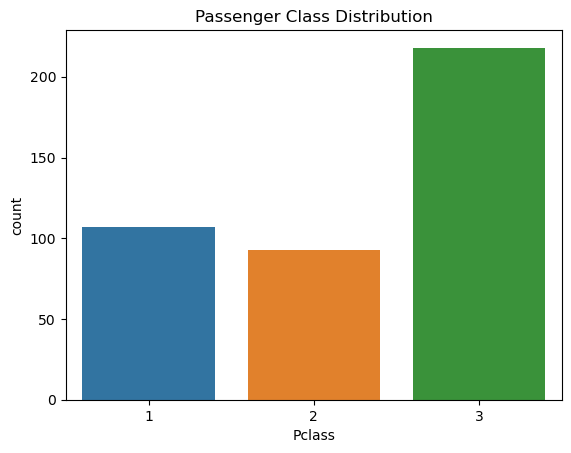


Female passengers who survived:
 1                     Wilkes, Mrs. James (Ellen Needs)
4         Hirvonen, Mrs. Alexander (Helga E Lindqvist)
6                                 Connolly, Miss. Kate
8            Abrahim, Mrs. Joseph (Sophie Halaut Easu)
12       Snyder, Mrs. John Pillsbury (Nelle Stevenson)
                            ...                       
409                          Peacock, Miss. Treasteall
410                             Naughton, Miss. Hannah
411    Minahan, Mrs. William Edward (Lillian E Thorpe)
412                     Henriksson, Miss. Jenny Lovisa
414                       Oliva y Ocana, Dona. Fermina
Name: Name, Length: 152, dtype: object

3rd class passengers under 18:
                                           Name    Age  Pclass
5                   Svensson, Mr. Johan Cervin  14.00       3
21                   Olsen, Master. Artur Karl   9.00       3
55                        Rice, Master. Albert  10.00       3
60                             Dika, Mr. 

In [1]:
# 1. Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

# 2. Load the dataset (renamed as tested.csv)
df = pd.read_csv('tested.csv')  # Make sure titanic.csv is renamed to tested.csv in your session

# 3. Understand the data
print("Shape of data:", df.shape)
print("\nInfo:")
print(df.info())
print("\nDescription:")
print(df.describe(include='all'))

# 4. Fill missing Age values using SimpleImputer
imputer = SimpleImputer(strategy='mean')
df['Age'] = imputer.fit_transform(df[['Age']])

# 5. Fill missing Cabin values with "Unknown"
df['Cabin'] = df['Cabin'].fillna('Unknown')

# 6. Fill missing Embarked with mode
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# 7. Analyze the passenger Class using countplot
sns.countplot(data=df, x='Pclass')
plt.title("Passenger Class Distribution")
plt.show()

# 8. List names of female passengers who survived
female_survivors = df[(df['Sex'] == 'female') & (df['Survived'] == 1)]
print("\nFemale passengers who survived:\n", female_survivors['Name'])

# 9. Passengers in 3rd class and under age 18
third_class_under18 = df[(df['Pclass'] == 3) & (df['Age'] < 18)]
print("\n3rd class passengers under 18:\n", third_class_under18[['Name', 'Age', 'Pclass']])

# 10. Passengers in 1st class older than 40
class1_above40 = df[(df['Pclass'] == 1) & (df['Age'] > 40)]
print("\nClass 1 passengers older than 40:\n", class1_above40[['Name', 'Age']])

# 11. Survived passengers from above category
survived_class1_above40 = class1_above40[class1_above40['Survived'] == 1]
print("\nSurvived Class 1 passengers older than 40:\n", survived_class1_above40[['Name', 'Age']])

# 12. Male passengers who paid fare > 100
high_fare_males = df[(df['Sex'] == 'male') & (df['Fare'] > 100)]
print("\nMale passengers who paid fare > 100:\n", high_fare_males[['Name', 'Fare']])

# 13. Passengers embarked from 'C' and in Class 2
embarked_c_class2 = df[(df['Embarked'] == 'C') & (df['Pclass'] == 2)]
print("\nPassengers from port 'C' and Class 2:\n", embarked_c_class2[['Name', 'Embarked', 'Pclass']])

# 14. Passengers with more than 2 siblings/spouses aboard
sibsp_gt2 = df[df['SibSp'] > 2]
print("\nPassengers with more than 2 siblings/spouses aboard:\n", sibsp_gt2[['Name', 'SibSp']])

# 15. Passengers who did not survive and had no family aboard
no_family_nosurvive = df[(df['Survived'] == 0) & (df['SibSp'] == 0) & (df['Parch'] == 0)]
print("\nDid not survive and no family aboard:\n", no_family_nosurvive[['Name', 'Survived', 'SibSp', 'Parch']])

# 16. Top 5 oldest passengers who survived
oldest_survivors = df[df['Survived'] == 1].sort_values(by='Age', ascending=False).head(5)
print("\nTop 5 oldest passengers who survived:\n", oldest_survivors[['Name', 'Age']])

# 17. Passengers who paid zero fare
zero_fare = df[df['Fare'] == 0]
print("\nPassengers who paid zero fare:\n", zero_fare[['Name', 'Fare']])

# 18. Split dataset for training and testing
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)
print("\nTrain shape:", train_df.shape)
print("Test shape:", test_df.shape)
